In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
from tqdm import tqdm

In [2]:
N=np.linspace(-5, 5, 1000)

def func(x, E):
    m=1
    w=1
    hb=1
    return (2*m*0.5*m*(w**2)*x**2/hb**2 - 2*m*E/hb**2)

def Numerov(N, E, P):
    psi = np.zeros_like(N)
    h = N[1]-N[0]
    psi[0] = 0
    psi[1] = 1*10**-5
    U = P(N, E)
    for i in range(2, len(N)):
        Psip = 1 - U[i-2]*h**2/12
        PsiP = 1 + U[i-1]*5*h**2/12
        PsiF = 1- U[i]*h**2/12

        psi[i] = (2*psi[i-1]*PsiP - psi[i-2]*Psip)/(PsiF)

    return psi

In [3]:
E = np.linspace(0.5, 6, 12)
sol=np.array([])
for i in E:
    if Numerov(N,i, func)[-1]*Numerov(N, i+0.001,func)[-1]<0:
        sol=np.append(sol,i)
sol

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])

<IPython.core.display.Javascript object>


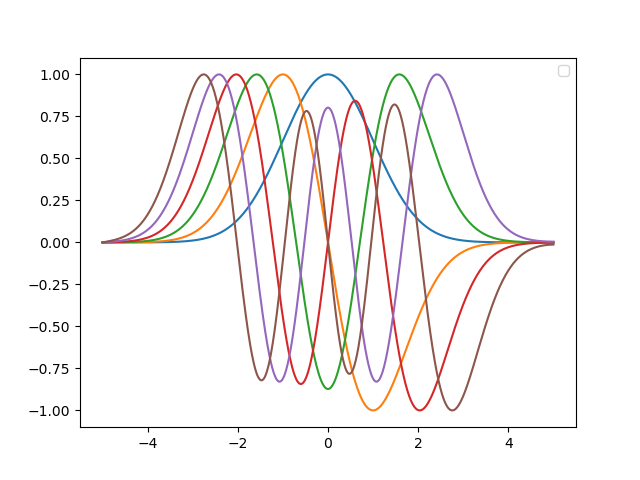

No handles with labels found to put in legend.


In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(N, Numerov(N,sol[0], func)/np.max(Numerov(N,sol[0], func)))
ax.plot(N, Numerov(N,sol[1], func)/np.max(Numerov(N,sol[1], func)))
ax.plot(N, Numerov(N,sol[2], func)/np.max(Numerov(N,sol[2], func)))
ax.plot(N, Numerov(N,sol[3], func)/np.max(Numerov(N,sol[3], func)))
ax.plot(N, Numerov(N,sol[4], func)/np.max(Numerov(N,sol[4], func)))
ax.plot(N, Numerov(N,sol[5], func)/np.max(Numerov(N,sol[5], func)))
ax.legend()

In [5]:
def func2(x, E):
    return -20*np.exp((-x**2)/20) -2*E
#si se coloca paso de 0.01 dentro del arrange solo se obtiene un valor, para obtener el resto de valores se debe utilizar 0.001
# y redondear
E2 = np.arange(-9.6, -5.8, 0.001)
sol2= np.array([])
for i in E2:
    if Numerov(N,i, func2)[-1]*Numerov(N, i+0.001,func2)[-1]<0:
        sol2=np.append(sol2,i)


array([-9.51 , -8.548, -7.625, -6.742, -5.899])

In [12]:
sol2=np.round(sol2,3)
sol2

array([-9.51, -8.55, -7.62, -6.74, -5.9 ])

<IPython.core.display.Javascript object>


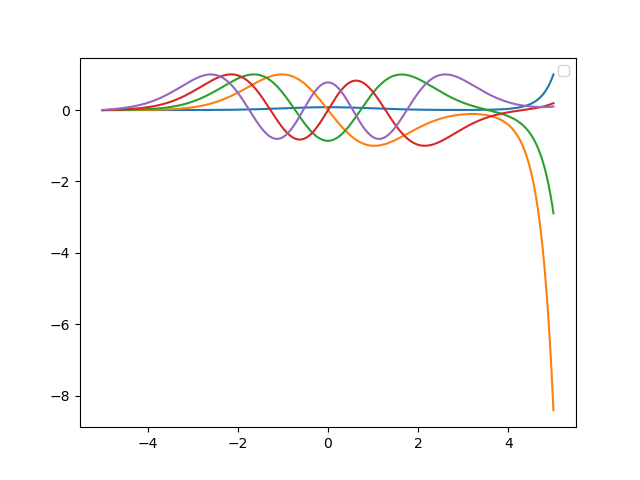

No handles with labels found to put in legend.


In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(N, Numerov(N,sol2[0], func2)/np.max(Numerov(N,sol2[0], func2)))
ax.plot(N, Numerov(N,sol2[1], func2)/np.max(Numerov(N,sol2[1], func2)))
ax.plot(N, Numerov(N,sol2[2], func2)/np.max(Numerov(N,sol2[2], func2)))
ax.plot(N, Numerov(N,sol2[3], func2)/np.max(Numerov(N,sol2[3], func2)))
ax.plot(N, Numerov(N,sol2[4], func2)/np.max(Numerov(N,sol2[4], func2)))
ax.legend()

In [16]:
def func3(x, E):
    return -8/((1+x**2)**2) -2*E

In [20]:
E3 = np.arange(-2.5, -0.4, 0.001)
sol3 = np.array([])
for i in E3:
    if Numerov(N,i, func3)[-1]*Numerov(N, i+0.001,func3)[-1]<0:
        sol3=np.append(sol3,i)

In [19]:
sol3

array([-1.8299, -1.8298, -1.8297, -1.8296, -1.8295, -1.8294, -1.8293,
       -1.8292, -1.8291, -1.829 , -0.8343, -0.8342, -0.8341, -0.834 ,
       -0.8339, -0.8338, -0.8337, -0.8336, -0.8335, -0.8334])

<IPython.core.display.Javascript object>


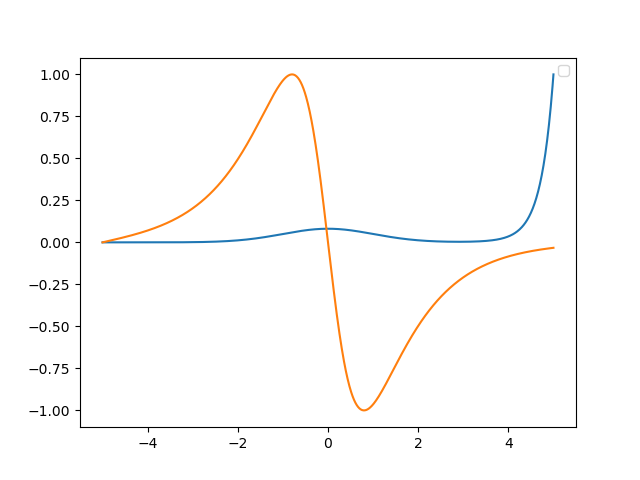

No handles with labels found to put in legend.


In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(N, Numerov(N,sol2[0], func2)/np.max(Numerov(N,sol2[0], func2)))
ax.plot(N, Numerov(N,sol3[1], func3)/np.max(Numerov(N,sol3[1], func3)))
ax.legend()